运行环境
Jupyter Server 1.4.1
python 3.8.8 
numpy 1.20.1
复现步骤：
把day.csv放到ipynb的同目录下，运行每个块即可

In [4]:
import numpy as np
print(np.__version__)

1.20.1


In [ ]:
#read data
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.data import *
data=pd.read_csv('day.csv') 

In [3]:
data['dteday'] = pd.to_datetime(data.dteday)

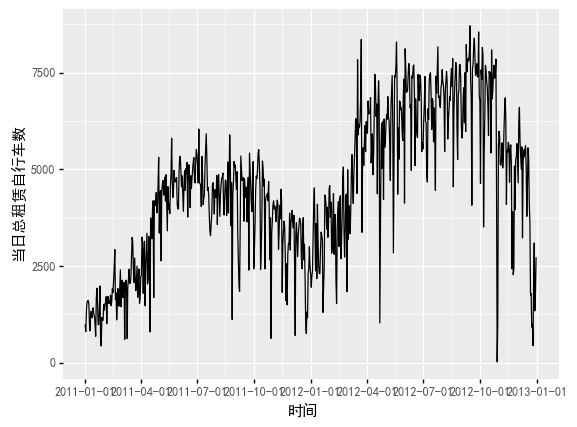

<ggplot: (149026351490)>

In [5]:
(
    ggplot(data, aes(x='dteday', y='cnt',group=1))
    + geom_line()             # plot geom_line as the first layer
    + labs(x='时间', y='当日总租赁自行车数') # label x & y-axis
    +theme(text=element_text(family="SimHei"))
)

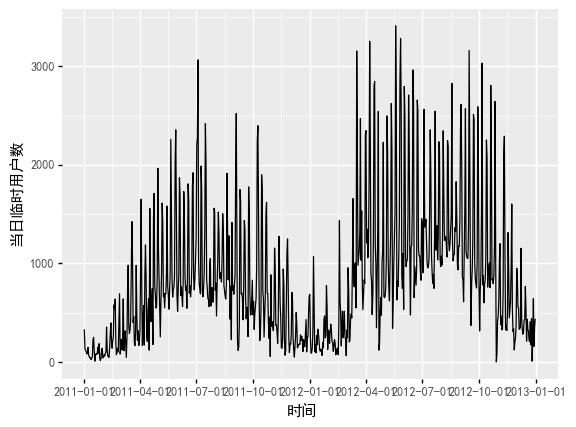

<ggplot: (149026278777)>

In [6]:
(
    ggplot(data, aes(x='dteday', y='casual',group=1))
    + geom_line()             # plot geom_line as the first layer
    + labs(x='时间', y='当日临时用户数') # label x & y-axis
    +theme(text=element_text(family="SimHei"))
)

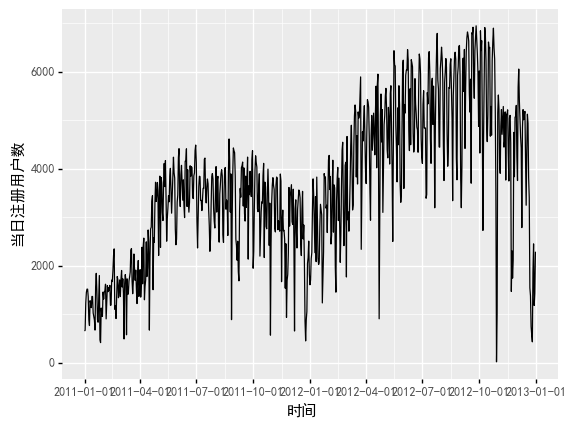

<ggplot: (149026317403)>

In [7]:
(
    ggplot(data, aes(x='dteday', y='registered',group=1))
    + geom_line()             # plot geom_line as the first layer
    + labs(x='时间', y='当日注册用户数') # label x & y-axis
    +theme(text=element_text(family="SimHei"))
)

In [ ]:
pdata=data.groupby(['mnth','yr']).agg(cnt=('cnt', 'sum'),casual=('casual', 'sum'),registered=('registered', 'sum')).reset_index()


(
    ggplot(pdata, aes(x='factor(month)', y='Value',color="Country"))
    + facet_wrap('Year')
    + geom_point(aes(size='Value'), shape='o',alpha=0.8)
         + labs(x='时间（月）', y='总出口成交量') # label x & y-axis
    +theme(text=element_text(family="SimHei"))

)

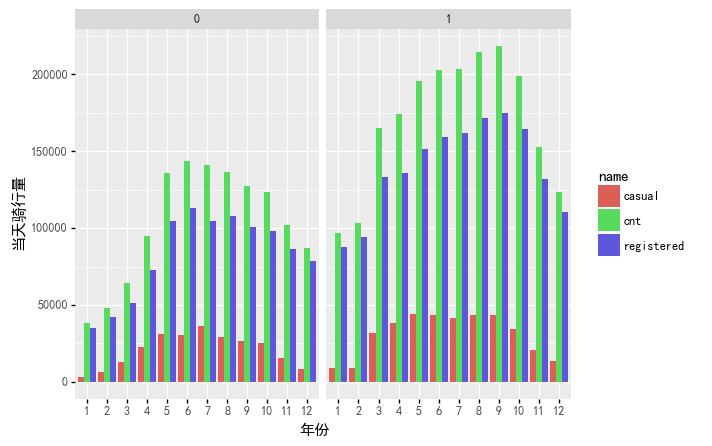

<ggplot: (149026138652)>

In [40]:
pdata=data.groupby(['mnth','yr']).agg(cnt=('cnt', 'sum'),casual=('casual', 'sum'),registered=('registered', 'sum')).reset_index()
pdata=pdata.set_index(['mnth','yr'])
pdata=pdata.stack().reset_index()
pdata.columns=['mnth', 'yr', 'name', 'value']
(
    ggplot(pdata, aes(x='factor(mnth)', fill='name',y='value'))
    +facet_wrap("yr")
    + geom_col(stat='identity', position='dodge')
     + labs(x='年份', y='当天骑行量') # label x & y-axis
    +theme(text=element_text(family="SimHei"))
)


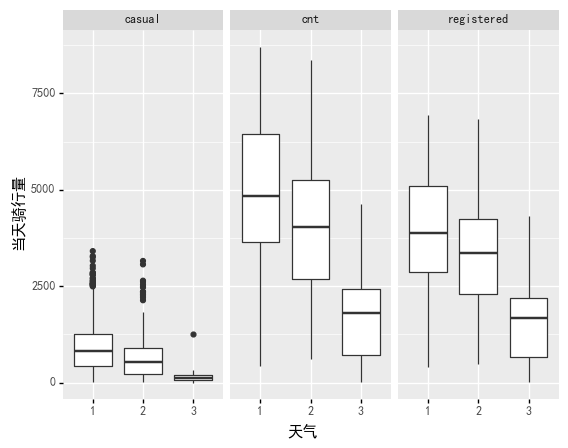

<ggplot: (149026139266)>

In [41]:
pdata=data[["weathersit","cnt","casual","registered"]].set_index(['weathersit'])
pdata=pdata.stack().reset_index()
pdata.columns=['weathersit', 'name', 'value']

(
    ggplot(pdata,aes(x='factor(weathersit)',y="value"))
    +facet_wrap("name")
      + geom_boxplot(show_legend=False)
    + labs(x='天气', y='当天骑行量') # label x & y-axis
    +theme(text=element_text(family="SimHei"))

)

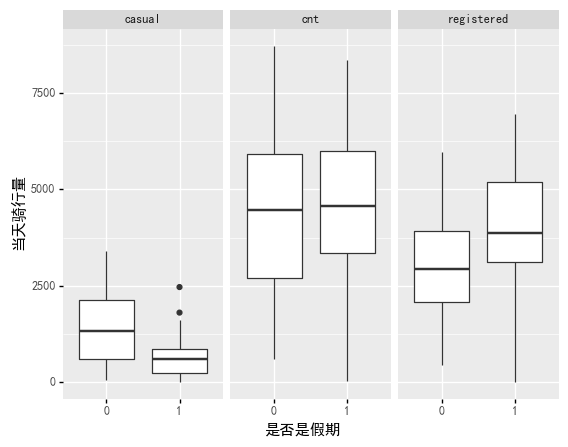

<ggplot: (149029892756)>

In [46]:
pdata=data[["workingday","cnt","casual","registered"]].set_index(['workingday'])
pdata=pdata.stack().reset_index()
pdata.columns=['workingday', 'name', 'value']

(
    ggplot(pdata,aes(x='factor(workingday)',y="value"))
    +facet_wrap("name")
      + geom_boxplot(show_legend=False)
    + labs(x='是否是假期', y='当天骑行量') # label x & y-axis
    +theme(text=element_text(family="SimHei"))

)

In [97]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
class mytree():
    def __init__(self,X,y,alpha=0):
        self.clf = tree.DecisionTreeClassifier(ccp_alpha=alpha)
        self.X=X
        self.y=y
    def train(self):
        try:
            self.clf = self.clf.fit(self.X, self.y)
        except ValueError:
            print("请检查是否有X，y维数不符的情况")
    def predict(self,X):
        try:
            return self.clf.predict(X)
        except ValueError:
            print("请检查是否有X维数不符的情况")
    def predict_proba(self,X):
        try:
            return self.clf.predict_proba(X)
        except ValueError:
            print("请检查是否有X维数不符的情况")
    def plot_tree(self,feature_names):
        plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
        tree.plot_tree(self.clf,feature_names=feature_names, fontsize=10)
        plt.show()
    def plot_roc(self):
        fpr, tpr, thresholds = metrics.roc_curve(self.y,self.predict_proba(self.X)[:,1])
        roc_auc = auc(fpr,tpr)
        plt.figure()
        lw = 2
        plt.plot(
            fpr,
            tpr,
            color="darkorange",
            lw=lw,
            label="ROC curve (area = %0.2f)" % roc_auc,
        )
        plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic example")
        plt.legend(loc="lower right")
        plt.show()

X = [[0, 0], [1, 1]]
Y = [0,1]

a=mytree(X,Y)
a.train()
a.predict_proba([[ 2.]])

请检查是否有X维数不符的情况


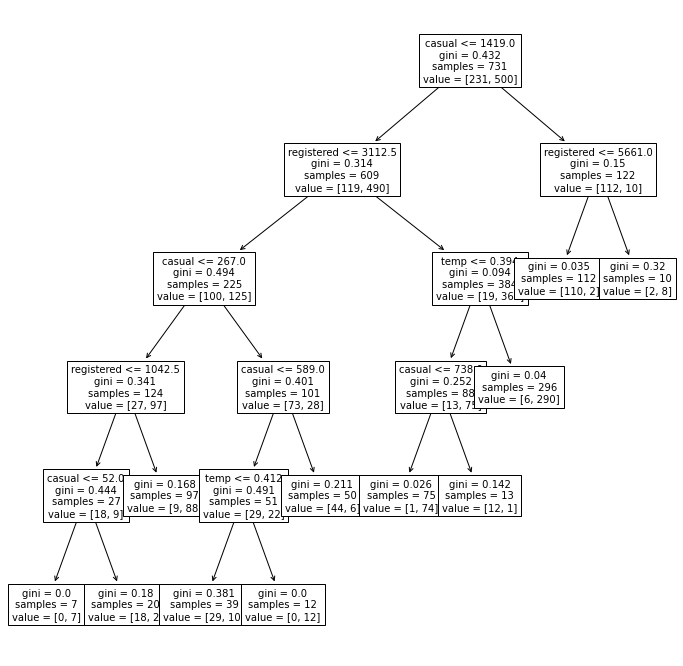

In [101]:
a=mytree(data[["weathersit","temp","cnt","casual","registered"]],data[["workingday"]],0.01)
a.train()
a.plot_tree(feature_names=["weathersit","temp","cnt","casual","registered"])

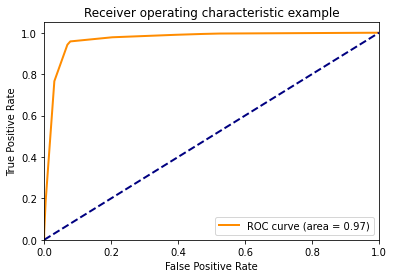

In [102]:
a.plot_roc()

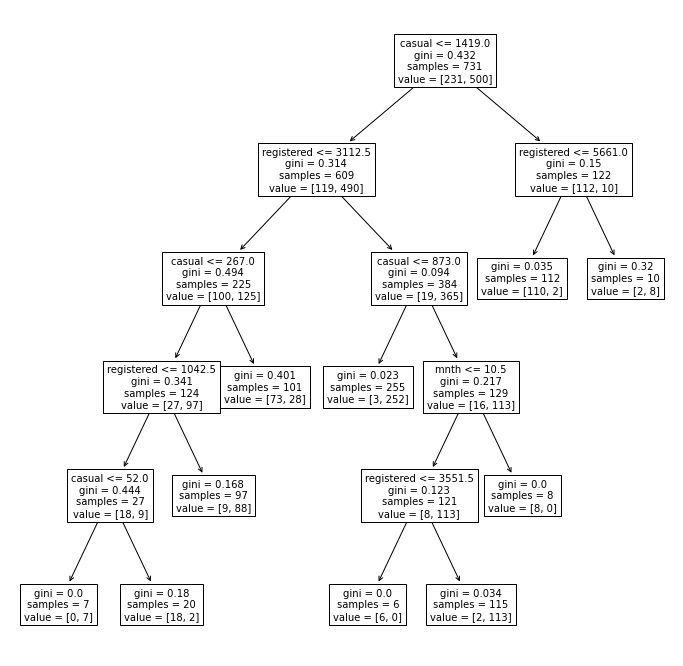

In [98]:
a=mytree(data[["mnth","cnt","casual","registered"]],data[["workingday"]],0.01)
a.train()
a.plot_tree(feature_names=["mnth","cnt","casual","registered"])


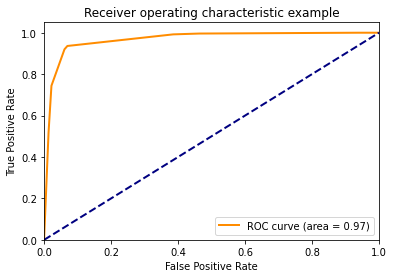

In [99]:
a.plot_roc()